In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from PIL import Image
from sklearn.decomposition import PCA
import random

In [2]:
input_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\models"
fourier_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\fourier"

if os.path.exists(fourier_dir):
    print(f"file already converted in the frequency domain and saved in {fourier_dir}!")

else:
    os.makedirs(fourier_dir, exist_ok=True)
    for subfolder in os.listdir(input_dir):
        subfolder_path = os.path.join(input_dir, subfolder)

        if os.path.isdir(subfolder_path):
            output_subfolder = os.path.join(fourier_dir, subfolder)
            os.makedirs(output_subfolder, exist_ok=True)

            for img_file in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_file)

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    
                    f = np.fft.fft2(img)
                    fshift = np.fft.fftshift(f)
                    magnitude = np.log(1 + np.abs(fshift))

                    output_img_path = os.path.join(output_subfolder, f"{os.path.splitext(img_file)[0]}.png")
                    plt.imsave(output_img_path, magnitude, cmap='viridis')

    print(f"The fourier Spectra are saved in '{output_dir}'!")

file already converted in the frequency domain and saved in C:\Users\LENOVO\Desktop\architecture\fourier!


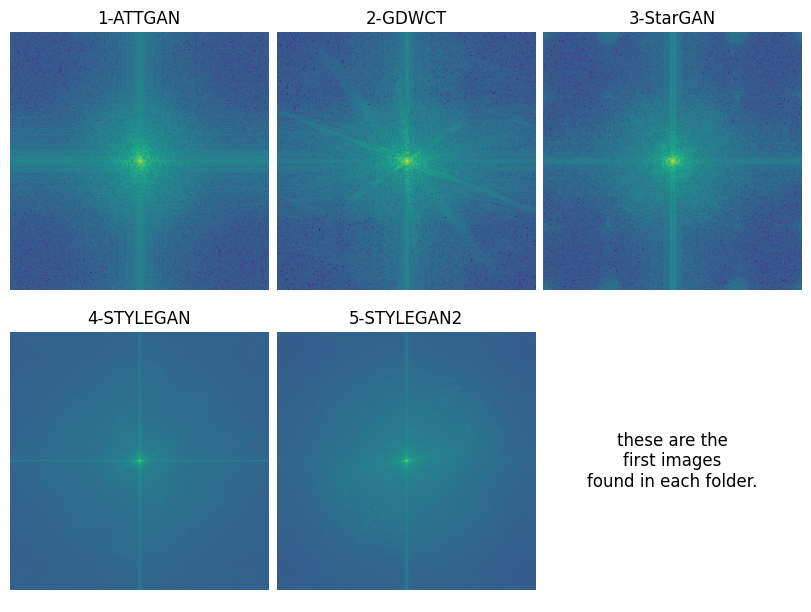

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),constrained_layout=True)  # 3 righe, 2 colonne
axes = axes.flatten()  # Trasforma la griglia in una lista di assi

idx = 0
for subfolder in os.listdir(fourier_dir):
    subfolder_path = os.path.join(fourier_dir, subfolder)
    if os.path.isdir(subfolder_path) and subfolder[0] in {"1", "2", "3", "4", "5"}:
    
        files = os.listdir(subfolder_path)
         # Mostra la prima immagine della cartella
        first_file_path = os.path.join(subfolder_path, files[0])
        img = cv2.imread(first_file_path, cv2.IMREAD_GRAYSCALE)
        axes[idx].imshow(img, cmap='viridis')
        axes[idx].set_title(f"{subfolder}")
        axes[idx].axis('off')
        idx += 1
    
    if idx == 5:
            break

for ax in axes[idx:]:
    ax.axis('off')
for ax in axes:
    if not ax.images:
        ax.text(0.5, 0.5, "these are the\nfirst images\nfound in each folder.", 
                color="black", fontsize=12, ha='center', va='center', wrap=True)
        ax.axis('off')


plt.show()

In [4]:
mean_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\fourier\\mean_fourier"
os.makedirs(mean_dir, exist_ok=True)

for subfolder in os.listdir(fourier_dir):
    subfolder_path = os.path.join(fourier_dir, subfolder)
    if os.path.isdir(subfolder_path) and subfolder[0] in {"1", "2", "3", "4", "5"}:
        
        images = []

        for img_file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append(img)

        mean_image = np.mean(images, axis=0)
        mean_image = mean_image.astype(np.uint8) 

        output_img_path = os.path.join(mean_dir, f"{subfolder}.png")
        plt.imsave(output_img_path, mean_image)
        print(f"saved mean-spectra '{subfolder}' in '{output_img_path}'")

saved mean-spectra '1-ATTGAN' in 'C:\Users\LENOVO\Desktop\architecture\fourier\mean_fourier\1-ATTGAN.png'
saved mean-spectra '2-GDWCT' in 'C:\Users\LENOVO\Desktop\architecture\fourier\mean_fourier\2-GDWCT.png'
saved mean-spectra '3-StarGAN' in 'C:\Users\LENOVO\Desktop\architecture\fourier\mean_fourier\3-StarGAN.png'
saved mean-spectra '4-STYLEGAN' in 'C:\Users\LENOVO\Desktop\architecture\fourier\mean_fourier\4-STYLEGAN.png'
saved mean-spectra '5-STYLEGAN2' in 'C:\Users\LENOVO\Desktop\architecture\fourier\mean_fourier\5-STYLEGAN2.png'


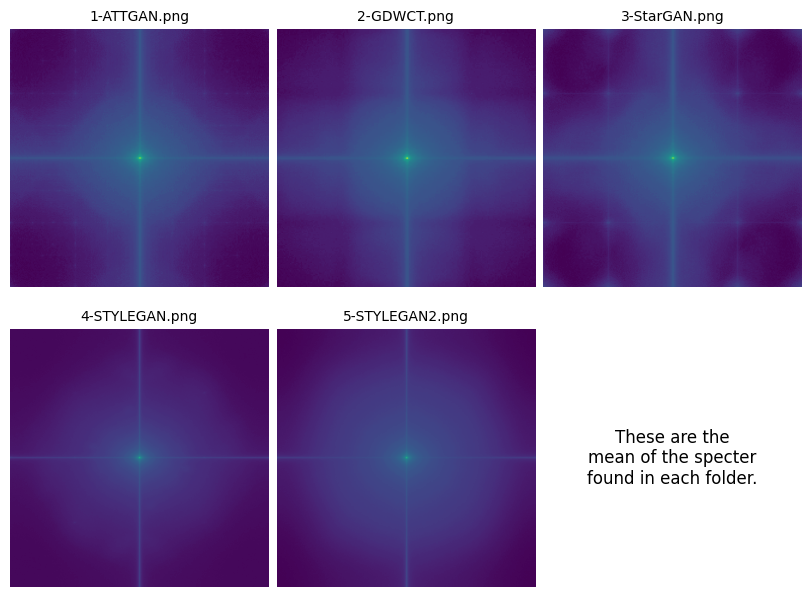

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), constrained_layout=True)
axes = axes.flatten()

idx = 0

for file in os.listdir(mean_dir):
    file_path = os.path.join(mean_dir, file)

    if os.path.isfile(file_path) and file.lower().endswith((".png", ".jpg", ".jpeg")):
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        axes[idx].imshow(img, cmap="viridis") 
        axes[idx].set_title(f"{file}", fontsize=10) 
        axes[idx].axis('off')
        idx += 1

    if idx == 5: 
        break

for ax in axes[idx:]:
    ax.text(0.5, 0.5, "These are the\nmean of the specter\nfound in each folder.", 
            color="black", fontsize=12, ha='center', va='center', wrap=True)
    ax.axis('off')

plt.show()

In [6]:
#SIFT
features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\SIFT"

sift = cv2.SIFT_create()

if not os.path.isdir(features_dir):
    os.makedirs(features_dir, exist_ok=True)
    
    for subfolder in os.listdir(fourier_dir):
        subfolder_path = os.path.join(fourier_dir, subfolder)
    
        if os.path.isdir(subfolder_path) and subfolder[0] in {"1", "2", "3", "4", "5"}:
            subfolder_features_path = os.path.join(features_dir, subfolder)
            os.makedirs(subfolder_features_path, exist_ok=True)
        
            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                
                if os.path.isfile(file_path) and file.lower().endswith((".png", ".jpg", ".jpeg")):
                    
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    
                    keypoints, descriptors = sift.detectAndCompute(img, None)
                    
                    feature_file_path = os.path.join(subfolder_features_path, f"{os.path.splitext(file)[0]}.npy")
                    np.save(feature_file_path, descriptors)
    
print("SIFT FEATURES EXTRACTION COMPLETED!")

SIFT FEATURES EXTRACTION COMPLETED!


In [7]:
# BLOB
features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\BLOB"

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 30
params.maxArea = 5000
params.filterByCircularity = True
params.minCircularity = 0.1
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByInertia = True
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)

if not os.path.isdir(features_dir):
    os.makedirs(features_dir, exist_ok=True)
    
    for subfolder in os.listdir(fourier_dir):
        subfolder_path = os.path.join(fourier_dir, subfolder)
    
        if os.path.isdir(subfolder_path) and subfolder[0] in {"1", "2", "3", "4", "5"}:
            subfolder_features_path = os.path.join(features_dir, subfolder)
            os.makedirs(subfolder_features_path, exist_ok=True)
        
            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                
                if os.path.isfile(file_path) and file.lower().endswith((".png", ".jpg", ".jpeg")):
                    
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                
    
                keypoints = detector.detect(img)
                blob_data = [{"x": kp.pt[0], "y": kp.pt[1], "size": kp.size} for kp in keypoints]
                feature_file_path = os.path.join(subfolder_features_path, f"{os.path.splitext(file)[0]}.npy")
                np.save(feature_file_path, blob_data)
                

print("BLOB FEATURES EXTRACTION COMPLETED!")

BLOB FEATURES EXTRACTION COMPLETED!


In [8]:
def extract_hog_features(image):
    features, hog_image = hog(image, 
                              orientations=9, 
                              pixels_per_cell=(8, 8), 
                              cells_per_block=(2, 2), 
                              block_norm='L2-Hys', 
                              visualize=True, 
                              channel_axis=None)
    return features, hog_image

def extract_lbp_features(image, P=8, R=1):
    lbp = local_binary_pattern(image, P, R, method="uniform")
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return hist, lbp


def extract_daisy_features(image):
    descs, daisy_image = daisy(image, 
                               step=16, 
                               radius=8, 
                               rings=3, 
                               histograms=8, 
                               orientations=8, 
                               visualize=True)
    return descs, daisy_image

# Funzione per salvare le feature in formato .npy
def save_features(features, output_path):
    np.save(output_path, features)

In [9]:
#HOG
features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\HOG"
if not os.path.isdir(features_dir):
    os.makedirs(features_dir, exist_ok=True)
    
    for subfolder in os.listdir(fourier_dir):
        subfolder_path = os.path.join(fourier_dir, subfolder)
    
        if os.path.isdir(subfolder_path) and subfolder[0] in {"1", "2", "3", "4", "5"}:
            subfolder_features_path = os.path.join(features_dir, subfolder)
            os.makedirs(subfolder_features_path, exist_ok=True)
        
            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                
                if os.path.isfile(file_path) and file.lower().endswith((".png", ".jpg", ".jpeg")):
                    
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
          
                    hog_output_path = os.path.join(subfolder_features_path, f"{os.path.splitext(file)[0]}.npy")
                    if not os.path.exists(hog_output_path):
                        hog_features, _ = extract_hog_features(img)
                        save_features(hog_features, hog_output_path)

print("HOG FEATURES EXTRACTION COMPLETED!")

HOG FEATURES EXTRACTION COMPLETED!


In [10]:
# LBP
features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\LBP"
if not os.path.isdir(features_dir):
    os.makedirs(features_dir, exist_ok=True)
    
    for subfolder in os.listdir(fourier_dir):
        subfolder_path = os.path.join(fourier_dir, subfolder)
    
        if os.path.isdir(subfolder_path) and subfolder[0] in {"1", "2", "3", "4", "5"}:
            subfolder_features_path = os.path.join(features_dir, subfolder)
            os.makedirs(subfolder_features_path, exist_ok=True)
        
            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                
                if os.path.isfile(file_path) and file.lower().endswith((".png", ".jpg", ".jpeg")):
                    
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            
                    lbp_output_path = os.path.join(subfolder_features_path, f"{os.path.splitext(file)[0]}.npy")
                    if not os.path.exists(lbp_output_path):
                        lbp_features, _ = extract_lbp_features(img)
                        save_features(lbp_features, lbp_output_path)

print("LBP FEATURES EXTRACTION COMPLETED!")

LBP FEATURES EXTRACTION COMPLETED!


In [11]:
features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\DAISY"
if not os.path.isdir(features_dir):
    os.makedirs(features_dir, exist_ok=True)
    
for subfolder in os.listdir(fourier_dir):
    subfolder_path = os.path.join(fourier_dir, subfolder)
    
    if os.path.isdir(subfolder_path) and subfolder[0] in {"1", "2", "3", "4", "5"}:
        subfolder_features_path = os.path.join(features_dir, subfolder)
        os.makedirs(subfolder_features_path, exist_ok=True)
        
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            
            if os.path.isfile(file_path) and file.lower().endswith((".png", ".jpg", ".jpeg")):
                daisy_output_path = os.path.join(subfolder_features_path, f"{os.path.splitext(file)[0]}.npy")
                
                if os.path.exists(daisy_output_path):
                    continue
                    
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                daisy_features, _ = extract_daisy_features(img)
                save_features(daisy_features, daisy_output_path)

print("DAISY FEATURES EXTRACTION COMPLETED!")

DAISY FEATURES EXTRACTION COMPLETED!


In [2]:
def show_metrics():
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=categories, yticklabels=categories, linewidths=0.5, linecolor='black')
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.title("Confusion Matrix", fontsize=14)
    plt.tick_params(axis='x', labelrotation=45)
    plt.show()
   
    precision = precision_score(y_test, y_pred, average=None, zero_division=0)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    
    df_metrics = pd.DataFrame({
        "Class": categories,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

    print("\nFor Each Class:")
    print(df_metrics.to_string(index=False))

    macro_f1 = f1_score(y_test, y_pred, average="macro")
    micro_f1 = f1_score(y_test, y_pred, average="micro")
    accuracy = svm.score(X_test, y_test) * 100

    df_global = pd.DataFrame({
        "Metric": ["Macro F1-score", "Micro F1-score", "Accuracy"],
        "Value": [round(macro_f1,3), round(micro_f1,3),round(accuracy,3)]
    })

    print("Global:")
    print(df_global.to_string(index=False))

In [3]:
categories = ["1-ATTGAN", "2-GDWCT", "3-STARGAN", "4-STYLEGAN", "5-STYLEGAN2"]

SIFT RESULTS:


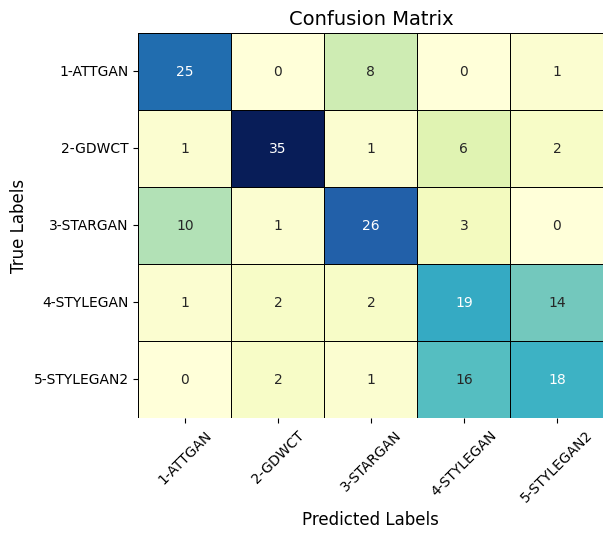


For Each Class:
      Class  Precision   Recall  F1-score
   1-ATTGAN   0.675676 0.735294  0.704225
    2-GDWCT   0.875000 0.777778  0.823529
  3-STARGAN   0.684211 0.650000  0.666667
 4-STYLEGAN   0.431818 0.500000  0.463415
5-STYLEGAN2   0.514286 0.486486  0.500000
Global:
        Metric  Value
Macro F1-score  0.632
Micro F1-score  0.634
      Accuracy 63.402


In [14]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\SIFT"

X, y = [], []

sample_fraction = 1

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
  
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]
    
    valid_features = []
    
    for file in npy_files:
        try:
            features = np.load(os.path.join(category_path, file), allow_pickle=True)
            if features.ndim == 2 and features.size > 0:
                valid_features.append(features)
        except Exception as e:
            print(f"ERROR WITH {file}: {e}")

    if len(valid_features) > 0:
        n_samples = max(1, int(len(valid_features) * sample_fraction))
        selected_features = random.sample(valid_features, min(n_samples, len(valid_features)))

        X.extend(selected_features)
        y.extend([label] * len(selected_features))

#Max dimension and padding with zero
max_dim = max(f.shape[0] for f in X)
X_padded = np.array([
    np.pad(f, ((0, max_dim - f.shape[0]), (0, 0)), 'constant') if f.shape[0] < max_dim else f[:max_dim]
    for f in X])
X_padded = X_padded.reshape(X_padded.shape[0], -1)  # (n_samples, n_features)

# PCA
n_components = 100
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

# normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

#train/test with SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SIFT RESULTS:")
show_metrics()

BLOB RESULTS:


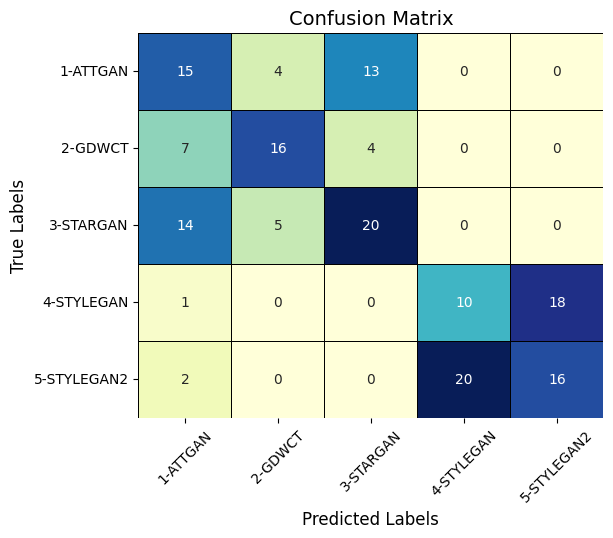


For Each Class:
      Class  Precision   Recall  F1-score
   1-ATTGAN   0.384615 0.468750  0.422535
    2-GDWCT   0.640000 0.592593  0.615385
  3-STARGAN   0.540541 0.512821  0.526316
 4-STYLEGAN   0.333333 0.344828  0.338983
5-STYLEGAN2   0.470588 0.421053  0.444444
Global:
        Metric  Value
Macro F1-score  0.470
Micro F1-score  0.467
      Accuracy 46.667


In [15]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\BLOB"

X, y = [], []

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
    
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]
    
    for file in npy_files:
        try:
            file_path = os.path.join(category_path, file)
            features = np.load(file_path, allow_pickle=True)

            # BLOB save features in a different way (like a dict with x,y,size)
            if isinstance(features[0], dict):
                features_array = np.array([[blob['x'], blob['y'], blob['size']] for blob in features])
            else:
                features_array = features

            #trasformation in 2dim for SVM
            if features_array.ndim == 2 and features_array.size > 0:
                X.append(features_array)
                y.append(label)

        except Exception as e:
            print(f" ERROR in {file}: {e}")

#PADDING
max_dim = max(f.shape[0] for f in X)
X_padded = np.array([
    np.pad(f, ((0, max_dim - f.shape[0]), (0, 0)), 'constant') if f.shape[0] < max_dim else f[:max_dim]
    for f in X])

X_padded = X_padded.reshape(X_padded.shape[0], -1)  # (n_samples, n_features)
n_samples, n_features = X_padded.shape

#PCA
n_components = min(100, min(n_samples, n_features))
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

#normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

#train/test and SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("BLOB RESULTS:")
show_metrics()

HOG RESULTS:


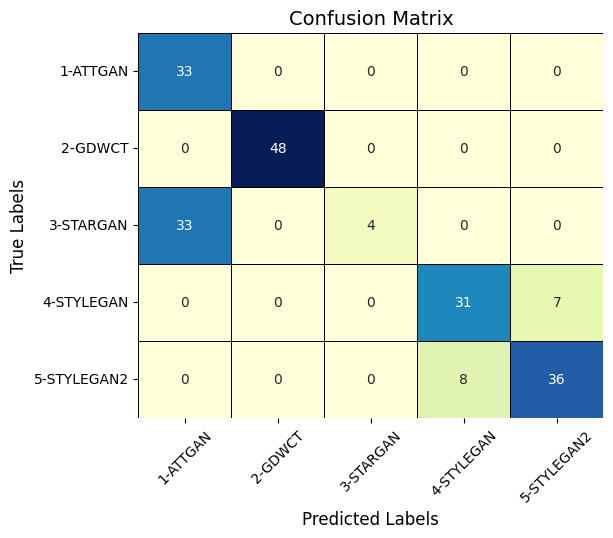


For Each Class:
      Class  Precision   Recall  F1-score
   1-ATTGAN   0.500000 1.000000  0.666667
    2-GDWCT   1.000000 1.000000  1.000000
  3-STARGAN   1.000000 0.108108  0.195122
 4-STYLEGAN   0.794872 0.815789  0.805195
5-STYLEGAN2   0.837209 0.818182  0.827586
Global:
        Metric  Value
Macro F1-score  0.699
Micro F1-score  0.760
      Accuracy 76.000


In [16]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\HOG"
categories = ["1-ATTGAN", "2-GDWCT", "3-STARGAN", "4-STYLEGAN", "5-STYLEGAN2"]

X, y = [], []

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
    
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]
    
    for file in npy_files:
        try:
            file_path = os.path.join(category_path, file)
            features = np.load(file_path, allow_pickle=True)

            #the features are 1D in HOG, so i've converted in 2D           
            features_array = features.reshape(1, -1) if features.ndim == 1 else features

            if features_array.ndim == 2 and features_array.size > 0:
                X.append(features_array)
                y.append(label)

        except Exception as e:
            print(f"Error in {file}: {e}")

# PADDING
max_dim = max(f.shape[1] for f in X)
X_padded = np.array([
    np.pad(f, ((0, 0), (0, max_dim - f.shape[1])), 'constant') if f.shape[1] < max_dim else f[:, :max_dim]
    for f in X])

X_padded = X_padded.reshape(X_padded.shape[0], -1)  # (n_samples, n_features)
n_samples, n_features = X_padded.shape
n_components = min(100, min(n_samples, n_features))

#PCA
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

#train/test and SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("HOG RESULTS:")
show_metrics()

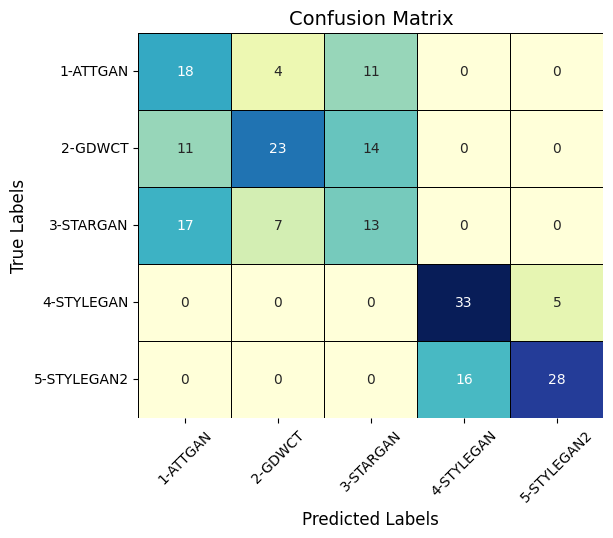


For Each Class:
      Class  Precision   Recall  F1-score
   1-ATTGAN   0.391304 0.545455  0.455696
    2-GDWCT   0.676471 0.479167  0.560976
  3-STARGAN   0.342105 0.351351  0.346667
 4-STYLEGAN   0.673469 0.868421  0.758621
5-STYLEGAN2   0.848485 0.636364  0.727273
Global:
        Metric  Value
Macro F1-score  0.570
Micro F1-score  0.575
      Accuracy 57.500


In [17]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\LBP"

X, y = [], []

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
    
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]

    for file in npy_files:
        try:
            file_path = os.path.join(category_path, file)
            features = np.load(file_path, allow_pickle=True)

            if features.ndim == 1:
                features_array = features.reshape(1, -1) 
            else:
                features_array = features

            if features_array.ndim == 2 and features_array.size > 0:
                X.append(features_array)
                y.append(label)

        except Exception as e:
            print(f"Error in {file}: {e}")

#padding
max_dim = max(f.shape[1] for f in X)

X_padded = np.array([
    np.pad(f, ((0, 0), (0, max_dim - f.shape[1])), 'constant') if f.shape[1] < max_dim else f[:, :max_dim]
    for f in X
])

X_padded = X_padded.reshape(X_padded.shape[0], -1)

n_samples, n_features = X_padded.shape

#PCA
n_components = min(100, min(n_samples, n_features))
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

# normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# train/test and SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

show_metrics()

DAISY RESULTS:


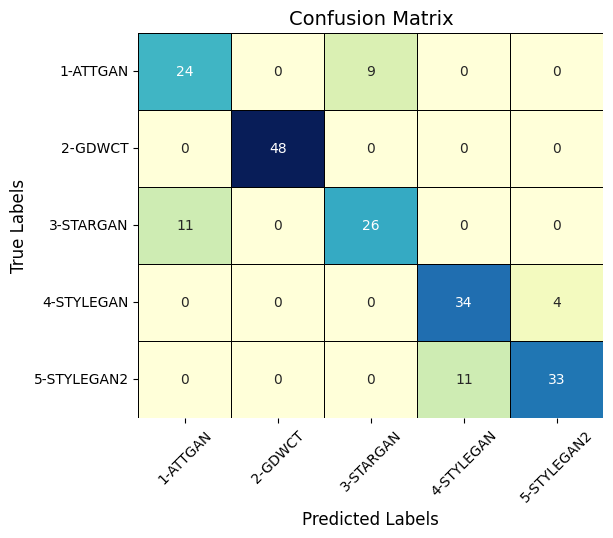


For Each Class:
      Class  Precision   Recall  F1-score
   1-ATTGAN   0.685714 0.727273  0.705882
    2-GDWCT   1.000000 1.000000  1.000000
  3-STARGAN   0.742857 0.702703  0.722222
 4-STYLEGAN   0.755556 0.894737  0.819277
5-STYLEGAN2   0.891892 0.750000  0.814815
Global:
        Metric  Value
Macro F1-score  0.812
Micro F1-score  0.825
      Accuracy 82.500


In [18]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\DAISY"

X, y = [], []

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
    
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]

    for file in npy_files:
        try:
            file_path = os.path.join(category_path, file)
            features = np.load(file_path, allow_pickle=True)

            if features.ndim == 3:
                features_array = features.reshape(1, -1) 
            elif features.ndim == 2:
                features_array = features
            else:
                features_array = features.reshape(1, -1)

            if features_array.ndim == 2 and features_array.size > 0:
                X.append(features_array)
                y.append(label)

        except Exception as e:
            print(f"Error in {file}: {e}")

#padding
max_dim = max(f.shape[1] for f in X)
X_padded = np.array([
    np.pad(f, ((0, 0), (0, max_dim - f.shape[1])), 'constant') if f.shape[1] < max_dim else f[:, :max_dim]
    for f in X
])

X_padded = X_padded.reshape(X_padded.shape[0], -1)  # (n_samples, n_features)
n_samples, n_features = X_padded.shape

#PCA
n_components = min(100, min(n_samples, n_features))
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

# Normalizzatiom
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

#train/test and SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("DAISY RESULTS:")
show_metrics()

DAISY RESULTS:


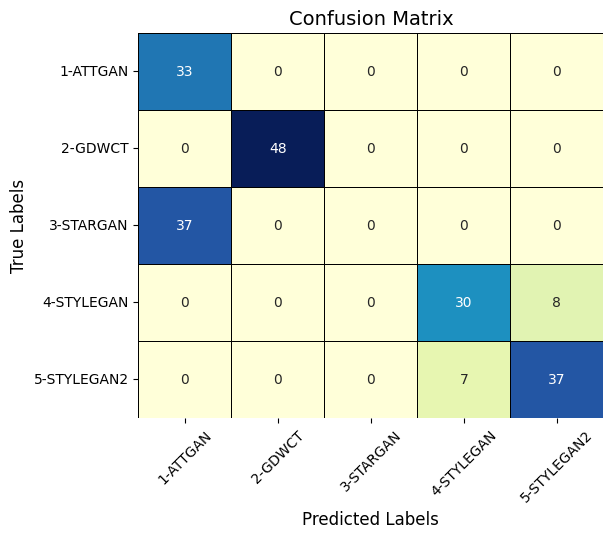


For Each Class:
      Class  Precision   Recall  F1-score
   1-ATTGAN   0.471429 1.000000  0.640777
    2-GDWCT   1.000000 1.000000  1.000000
  3-STARGAN   0.000000 0.000000  0.000000
 4-STYLEGAN   0.810811 0.789474  0.800000
5-STYLEGAN2   0.822222 0.840909  0.831461
Global:
        Metric  Value
Macro F1-score  0.654
Micro F1-score  0.740
      Accuracy 74.000


In [4]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\DAISY"

X, y = [], []

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
    
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]

    for file in npy_files:
        try:
            file_path = os.path.join(category_path, file)
            features = np.load(file_path, allow_pickle=True)

            if features.ndim == 3:
                features_array = features.reshape(1, -1) 
            elif features.ndim == 2:
                features_array = features
            else:
                features_array = features.reshape(1, -1)

            if features_array.ndim == 2 and features_array.size > 0:
                X.append(features_array)
                y.append(label)

        except Exception as e:
            print(f"Error in {file}: {e}")

#padding
max_dim = max(f.shape[1] for f in X)
X_padded = np.array([
    np.pad(f, ((0, 0), (0, max_dim - f.shape[1])), 'constant') if f.shape[1] < max_dim else f[:, :max_dim]
    for f in X
])

X_padded = X_padded.reshape(X_padded.shape[0], -1)  # (n_samples, n_features)
n_samples, n_features = X_padded.shape

#PCA
n_components = min(100, min(n_samples, n_features))
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

# Normalizzatiom
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

#train/test and SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="sigmoid", C=1.0, gamma="scale")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("DAISY RESULTS:")
show_metrics()

DAISY RESULTS:


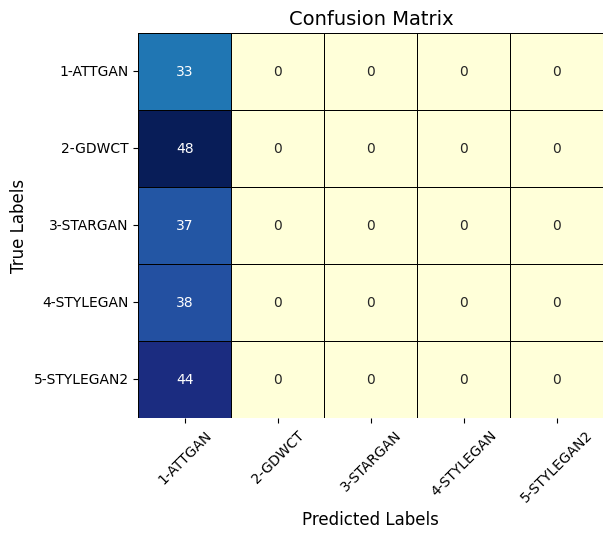


For Each Class:
      Class  Precision  Recall  F1-score
   1-ATTGAN      0.165     1.0  0.283262
    2-GDWCT      0.000     0.0  0.000000
  3-STARGAN      0.000     0.0  0.000000
 4-STYLEGAN      0.000     0.0  0.000000
5-STYLEGAN2      0.000     0.0  0.000000
Global:
        Metric  Value
Macro F1-score  0.057
Micro F1-score  0.165
      Accuracy 16.500


In [5]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\DAISY"

X, y = [], []

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
    
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]

    for file in npy_files:
        try:
            file_path = os.path.join(category_path, file)
            features = np.load(file_path, allow_pickle=True)

            if features.ndim == 3:
                features_array = features.reshape(1, -1) 
            elif features.ndim == 2:
                features_array = features
            else:
                features_array = features.reshape(1, -1)

            if features_array.ndim == 2 and features_array.size > 0:
                X.append(features_array)
                y.append(label)

        except Exception as e:
            print(f"Error in {file}: {e}")

#padding
max_dim = max(f.shape[1] for f in X)
X_padded = np.array([
    np.pad(f, ((0, 0), (0, max_dim - f.shape[1])), 'constant') if f.shape[1] < max_dim else f[:, :max_dim]
    for f in X
])

X_padded = X_padded.reshape(X_padded.shape[0], -1)  # (n_samples, n_features)
n_samples, n_features = X_padded.shape

#PCA
n_components = min(100, min(n_samples, n_features))
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

# Normalizzatiom
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

#train/test and SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="poly", degree=3, C=1.0, gamma="scale")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("DAISY RESULTS:")
show_metrics()

DAISY RESULTS:


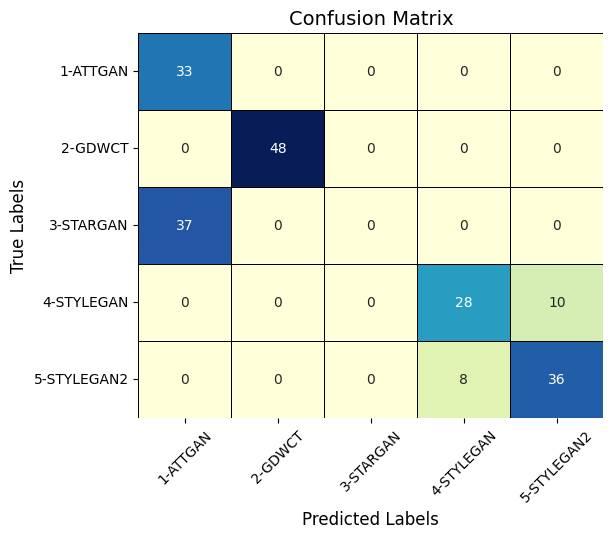


For Each Class:
      Class  Precision   Recall  F1-score
   1-ATTGAN   0.471429 1.000000  0.640777
    2-GDWCT   1.000000 1.000000  1.000000
  3-STARGAN   0.000000 0.000000  0.000000
 4-STYLEGAN   0.777778 0.736842  0.756757
5-STYLEGAN2   0.782609 0.818182  0.800000
Global:
        Metric  Value
Macro F1-score  0.640
Micro F1-score  0.725
      Accuracy 72.500


In [6]:
random.seed(42)
np.random.seed(42)

features_dir = "C:\\Users\\LENOVO\\Desktop\\architecture\\features\\DAISY"

X, y = [], []

for label, category in enumerate(categories):
    category_path = os.path.join(features_dir, category)
    
    npy_files = [f for f in os.listdir(category_path) if f.endswith(".npy")]

    for file in npy_files:
        try:
            file_path = os.path.join(category_path, file)
            features = np.load(file_path, allow_pickle=True)

            if features.ndim == 3:
                features_array = features.reshape(1, -1) 
            elif features.ndim == 2:
                features_array = features
            else:
                features_array = features.reshape(1, -1)

            if features_array.ndim == 2 and features_array.size > 0:
                X.append(features_array)
                y.append(label)

        except Exception as e:
            print(f"Error in {file}: {e}")

#padding
max_dim = max(f.shape[1] for f in X)
X_padded = np.array([
    np.pad(f, ((0, 0), (0, max_dim - f.shape[1])), 'constant') if f.shape[1] < max_dim else f[:, :max_dim]
    for f in X
])

X_padded = X_padded.reshape(X_padded.shape[0], -1)  # (n_samples, n_features)
n_samples, n_features = X_padded.shape

#PCA
n_components = min(100, min(n_samples, n_features))
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_padded)

# Normalizzatiom
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

#train/test and SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel="rbf", C=1.0, gamma="scale")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("DAISY RESULTS:")
show_metrics()